-                                                                                                  Name     : Bygari Aravind
-                                                                                                  Rg. No.  : 12013514
-                                                                                                  Roll No. : 13
- Section  : K20MD

### ABOUT THE DATASET & CONTEXT

### Context

- In the recent killings, a hot topic came into being, "Racism". So, I chose to gather some data to take out some insights and analyze the story around racism in America.
- I downloaded the raw data from kaggle and prepared it for visualization while correcting values, handling missing content, normalization and categorization.

### Content

- This dataset has been prepared by The Washington Post (they keep updating it on runtime) with every fatal shooting in the United States by a police officer in the line of duty since Jan 1, 2015.

- It contains basic data about people like their name, age, gender and race. Along with it, is the shooting/killing information, like date of event, where it happened? how they were shot? did they attack? Were they holding weapons? Did they show any mental illness? Was the policeman wearing a camera/was the incident recorded? Did the suspect flee? Apart from that, a category column holds type of weapon used by the suspect.

### Approach
- My approach for this project is firstly i will be cleaning data like removing null values, outliers, changing data types and then i will import all the usefull libraries like numpy, pandas, matplotlib because these are the main libraries for any dataset to analize by plotting the graphs like bargraph, histogram, piechart ect.

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%pwd

'C:\\Users\\DELL'

#### Reading CSV File

In [3]:
df=pd.read_csv(r"C:\Users\DELL\Downloads\shootings.csv")
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [28]:
df.shape

(4895, 15)

#### Statistical Information

In [4]:
df.describe()

,id,age
count,4895.000000,4895.000000
mean,2902.148519,36.549750
std,1683.467910,12.694348
min,3.000000,6.000000
25%,1441.500000,27.000000
50%,2847.000000,35.000000
75%,4352.500000,45.000000
max,5925.000000,91.000000


#### Here, id and age columns are only numeric type

### Data Cleaning

In [5]:
df.isnull().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
arms_category              0
dtype: int64

#### There are multiple types of data types available in the data set. some of them are numerical type and some of categorical type. You are required to get the idea about the data types after reading the data frame.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       4895 non-null   int64  
 1   name                     4895 non-null   object 
 2   date                     4895 non-null   object 
 3   manner_of_death          4895 non-null   object 
 4   armed                    4895 non-null   object 
 5   age                      4895 non-null   float64
 6   gender                   4895 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     4895 non-null   object 
 9   state                    4895 non-null   object 
 10  signs_of_mental_illness  4895 non-null   bool   
 11  threat_level             4895 non-null   object 
 12  flee                     4895 non-null   object 
 13  body_camera              4895 non-null   bool   
 14  arms_category           

In [7]:
df['year']=df['date'].apply(lambda x: x.split('-')[0])
df.year.head(2)

0    2015
1    2015
Name: year, dtype: object

#### Converting Data Types

In [8]:
#if coulumn contains any null values then sometimes we may not able to change data type of it. so, for it firstly we have to check for null values if your data set contains any.
df.isnull().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
arms_category              0
dtype: int64

#### Here, if we observe dataframe carefully only two columns datatypes i.e "date" and "age" have to be changed from "object" type to "datetime" type and "float" to "int" respectively and as of my knowledge this can be done in two ways 
####                                                                  1. .astype('datetime64[ns]') / .astype('int')
####                                                                  2. pd.to_datetime() / pd.to_numeric()                                    

In [8]:
df['date']=pd.to_datetime(df['date'])
df['date'].head(2)

0   2015-01-02
1   2015-01-02
Name: date, dtype: datetime64[ns]

In [ ]:
df['dates'] = pd.to_datetime(df['dates'], format='%y%m%d') #we use this syntex if we have to change both datatype and format but if we see in dataframe, format of date column is already in std fromat.

In [9]:
df['age']=df['age'].astype(int,errors="ignore")  #However, if the data type is not suitable for the values of the column, by default this method will throw a ValueError thats why we use errors argument. 
df['age'].dtype

dtype('int32')

In [10]:
df['year']=df['year'].astype('int')
df['year'].dtype

dtype('int32')

### Handling Outliers

#### As we all know that we can only find outliers for numerical data type columns and in this dataframe only two columns i.e "id" and "age"  fall under that category but unfortunately there is no need to calculate outliers for id column as people do have ids as any value in infinity range so we have to perform "handling outliers" operation only on 'age' column.

#### Age Variable 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       4895 non-null   int64         
 1   name                     4895 non-null   object        
 2   date                     4895 non-null   datetime64[ns]
 3   manner_of_death          4895 non-null   object        
 4   armed                    4895 non-null   object        
 5   age                      4895 non-null   int32         
 6   gender                   4895 non-null   object        
 7   race                     4895 non-null   object        
 8   city                     4895 non-null   object        
 9   state                    4895 non-null   object        
 10  signs_of_mental_illness  4895 non-null   bool          
 11  threat_level             4895 non-null   object        
 12  flee                     4895 non-

In [11]:
df.age.describe()

count    4895.000000
mean       36.547702
std        12.694266
min         6.000000
25%        27.000000
50%        35.000000
75%        45.000000
max        91.000000
Name: age, dtype: float64

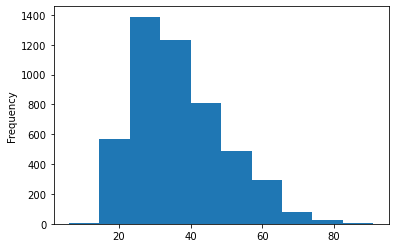

In [13]:
df.age.plot.hist()
plt.show()

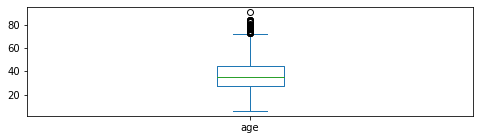

In [14]:
plt.figure(figsize=[8,2])
df.age.plot.box()
plt.show()

In [17]:
df.age.quantile([0.5,0.7,0.95,0.99,1])

0.50    35.0
0.70    42.0
0.95    60.0
0.99    71.0
1.00    91.0
Name: age, dtype: float64

#### If we see here the maximum value of "age" column is 91 which is acceptable that means people with age 91 is possible and we don't have to remove/bin/cut it.

### UNIVARIATE ANALYSIS

### Numerical Univariate Analysis

In [105]:
df.age.describe()

count    4895.000000
mean       36.547702
std        12.694266
min         6.000000
25%        27.000000
50%        35.000000
75%        45.000000
max        91.000000
Name: age, dtype: float64

#### The mean age of the shooting victims is around 36-37 years.The minimum age recorded for a victim is 6 years which is very surprising at the least. No explanation can be provided for the killing of a child who is not even over 10.

In [106]:
df.loc[df.age==6]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,year
811,980,Jeremy Mardis,2015-11-03,shot,unarmed,6,M,White,Marksville,LA,False,other,Car,True,Unarmed,2015
2761,3229,Kameron Prescott,2017-12-21,shot,unarmed,6,M,White,Schertz,TX,False,other,Not fleeing,False,Unarmed,2017


#### There are two cases of the victim being 6 years old. The more surprising thing is both of the kids were unarmed so I don't see the logic behind shooting them. These are some highly disturbing findings.

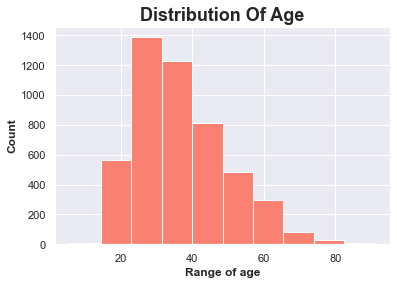

In [125]:
df.age.plot.hist(color='salmon')
sns.set_theme(style='darkgrid')
plt.title("Distribution Of Age", fontdict={'fontweight':'bold', 'fontsize':18})
plt.xlabel("Range of age", fontweight='bold')
plt.ylabel("Count", fontweight='bold')
plt.show()

#### As we can see, most individuals are between 25-40 years old with an average one being 36 Years old.

In [129]:
df.year.value_counts()

2015    965
2017    906
2016    904
2018    888
2019    858
2020    374
Name: year, dtype: int64

In [141]:
df['year']=df['year'].astype(int)
df.year.head(2)

0    2015
1    2015
Name: year, dtype: int32

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


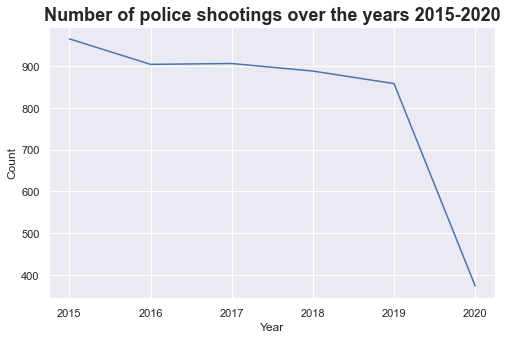

In [16]:
data = df.groupby(['year'])['name'].count().reset_index()
data.columns = ['Year', 'Count']
plt.figure(figsize = (8,5))
sns.set_theme(style="darkgrid")
sns.lineplot(data['Year'] , data['Count'])
plt.title('Number of police shootings over the years 2015-2020' , fontdict={ 'fontweight' : 'bold', 'fontsize' : 18 })
plt.show()

#### We only have data upto 15th June of 2020, but it can be seen that for the years between 2015-2019 the police killings are on a decline.

###  Categoriacl Unordered Univariate Analysis

### Manner Of Death Column : This column shows you whether person is shot dead with gun or taser.

In [19]:
df.manner_of_death.value_counts()

shot                4647
shot and Tasered     248
Name: manner_of_death, dtype: int64

In [20]:
df.manner_of_death.value_counts(normalize=True)

shot                0.949336
shot and Tasered    0.050664
Name: manner_of_death, dtype: float64

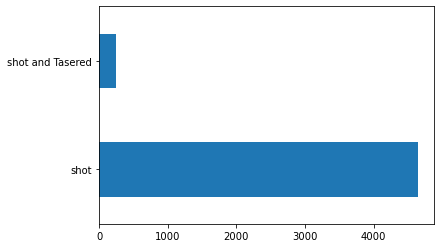

In [24]:
df.manner_of_death.value_counts().plot.barh()
plt.show()

In [16]:
plt.plot.__class__

function

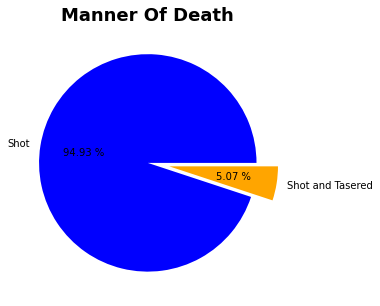

In [32]:
plt.figure(figsize=(5,5))
plt.pie(df.manner_of_death.value_counts() , autopct = '%.2f %%' , labels = ['Shot' , 'Shot and Tasered'] , 
        colors = ['blue','orange'], explode = (0,0.2))
plt.title('Manner Of Death' , fontdict={ 'fontweight' : 'bold', 'fontsize' : 18, })
plt.show()

#### This 5% of the graph shows the distribution of people that were shot and tasered. The whole point of tasering is to neutralise someone. Its hard to imagine shooting someone even after tasering them. It is really disturbing that the police has to resort to shooting even after using tasers.

### Race Column : In this column people are being categorized based on their skin colours.

In [26]:
df.race.value_counts()

White       2476
Black       1298
Hispanic     902
Asian         93
Native        78
Other         48
Name: race, dtype: int64

In [27]:
df.race.value_counts(normalize=True)

White       0.505822
Black       0.265169
Hispanic    0.184270
Asian       0.018999
Native      0.015935
Other       0.009806
Name: race, dtype: float64

<AxesSubplot:>

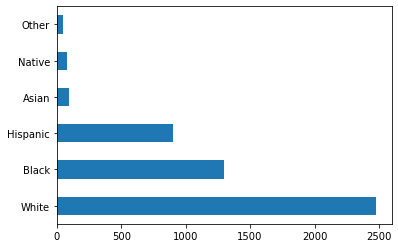

In [28]:
df.race.value_counts().plot.barh()

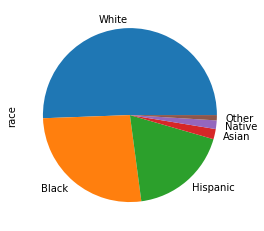

In [30]:
df.race.value_counts().plot.pie()
plt.show()

#### Almost 28% of the shot and tasered victims are Black.

### Threat Column : This column represents officers facing threats from the people

In [32]:
df.threat_level.value_counts()

attack          3160
other           1528
undetermined     207
Name: threat_level, dtype: int64

In [33]:
df.threat_level.value_counts(normalize=True)

attack          0.645557
other           0.312155
undetermined    0.042288
Name: threat_level, dtype: float64

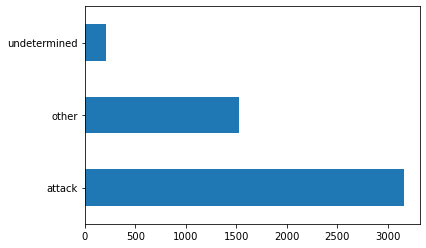

In [36]:
df.threat_level.value_counts().plot.barh()
plt.show()

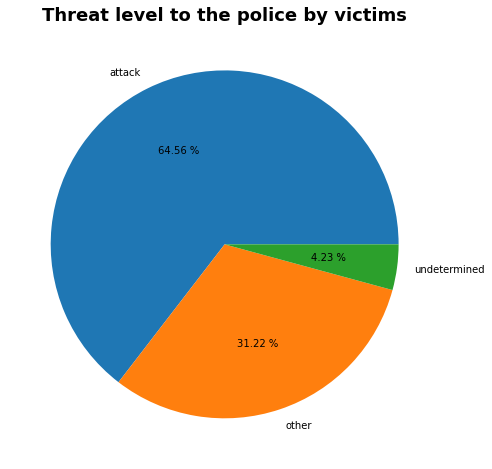

In [47]:
plt.figure(figsize = (8,8))
plt.pie(df.threat_level.value_counts() ,  autopct = '%.2f %%', labels = ['attack' , 'other', 'undetermined'])
plt.title('Threat level to the police by victims' , fontdict={ 'fontweight' : 'bold', 'fontsize' : 18 })
plt.show()

#### 'Undetermined' and 'other' are pretty vague descriptions of the threat level posed by the victims. This does not paint a clear picture at all but we have to take the word of the police for it.

### Flee Column : This column gives you information about  people like whether they are running away from officers by using vehicles like Car or they are not running anywhere.

In [41]:
df.flee.value_counts()

Not fleeing    3073
Car             820
Foot            642
Other           360
Name: flee, dtype: int64

In [42]:
df.flee.value_counts(normalize=True)

Not fleeing    0.627783
Car            0.167518
Foot           0.131154
Other          0.073544
Name: flee, dtype: float64

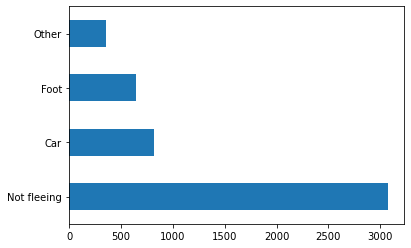

In [44]:
df.flee.value_counts().plot.barh()
plt.show()

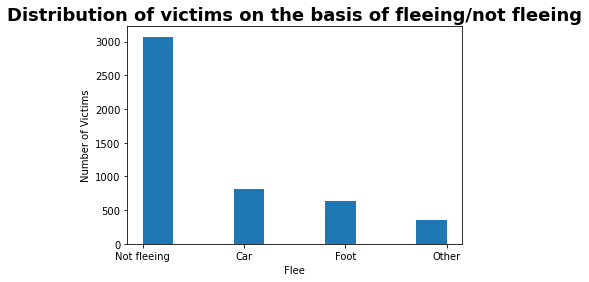

In [50]:
plt.hist(df.flee)
plt.title('Distribution of victims on the basis of fleeing/not fleeing' , 
          fontdict={ 'fontweight' : 'bold', 'fontsize' : 18 })
plt.xlabel('Flee')
plt.ylabel('Number of Victims')
plt.show()

#### Most of the victims fall in the not fleeing category. If they were not even trying to run away, was it really necessary to shoot?

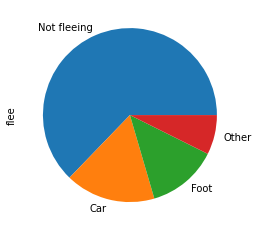

In [45]:
df.flee.value_counts().plot.pie()
plt.show()

#### With this plot we can observe that most of the people are not able to escape from police officers but if they are escaping then most them escaping using cars.

### Arms Category : This column indicates that the victim was armed with some sort of weapons which could have harmed police officers.

In [52]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [63]:
df.arms_category.value_counts()

Guns                     2764
Sharp objects             818
Unknown                   418
Unarmed                   348
Other unusual objects     192
Blunt instruments         122
Vehicles                  121
Multiple                   54
Piercing objects           29
Electrical devices         24
Explosives                  4
Hand tools                  1
Name: arms_category, dtype: int64

In [62]:
np.unique(df.armed)

array(['BB gun', 'BB gun and vehicle', 'Taser', 'air conditioner',
       'air pistol', 'ax', 'barstool', 'baseball bat',
       'baseball bat and bottle', 'baseball bat and fireplace poker',
       'baseball bat and knife', 'baton', 'bayonet', 'bean-bag gun',
       'beer bottle', 'blunt object', 'bow and arrow', 'box cutter',
       'brick', 'car, knife and mace', 'carjack', 'chain', 'chain saw',
       'chainsaw', 'chair', "contractor's level", 'cordless drill',
       'crossbow', 'crowbar', 'fireworks', 'flagpole', 'flashlight',
       'garden tool', 'glass shard', 'grenade', 'gun', 'gun and car',
       'gun and knife', 'gun and sword', 'gun and vehicle',
       'guns and explosives', 'hammer', 'hand torch', 'hatchet',
       'hatchet and gun', 'ice pick', 'incendiary device', 'knife',
       'lawn mower blade', 'machete', 'machete and gun', 'meat cleaver',
       'metal hand tool', 'metal object', 'metal pipe', 'metal pole',
       'metal rake', 'metal stick', 'motorcycle', 'nail

#### The US Police Department have done a pretty good job of putting almost every possible weapon known to me on that list.This list contains some object that would barely qualify as a weapon.

<AxesSubplot:>

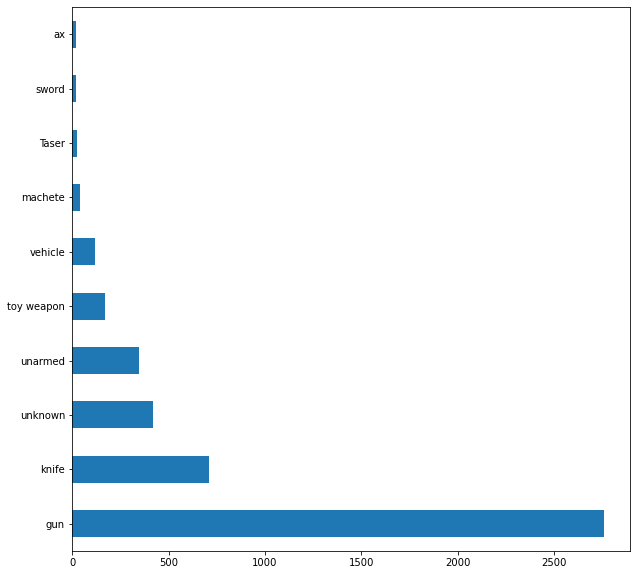

In [60]:
plt.figure(figsize=(10,10))
df.armed.value_counts().head(10).plot.barh()

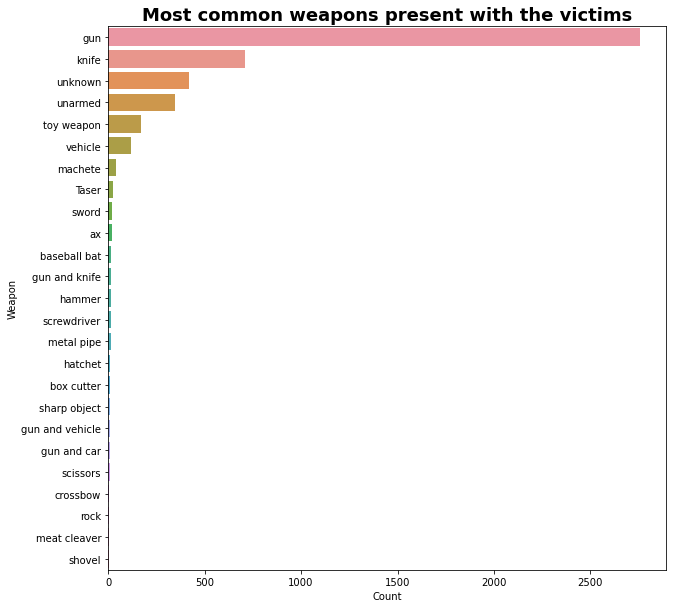

In [57]:
data = df['armed'].value_counts().reset_index().head(25)
data.columns = ['Weapon' , 'Count']
plt.figure(figsize = (10,10))
sns.barplot(x = 'Count' , y = 'Weapon' , data = data)
plt.title('Most common weapons present with the victims' , fontdict={ 'fontweight' : 'bold', 'fontsize' : 18 })
plt.show()

#### We can see that the most popular weapons are gun and knife but they are followed by unknown and unarmed. Lets take a deeper dive to understand this pattern. Lets focus on the "Unarmed victims" for our next part of analysis.

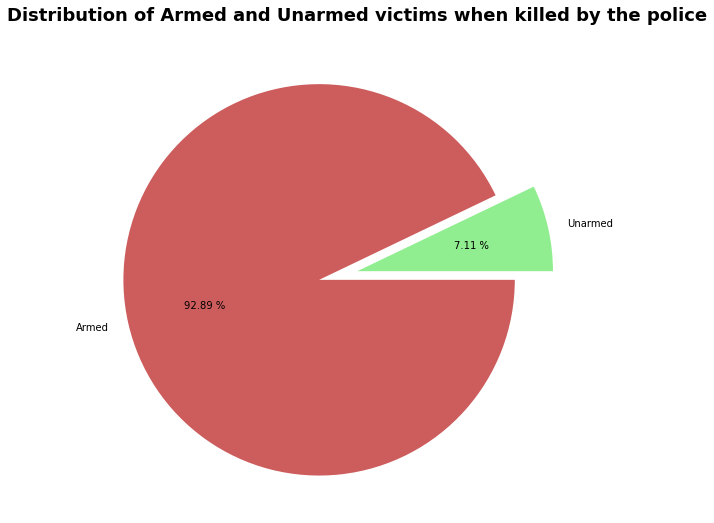

In [72]:
label = ['Unarmed','Armed']
ar = []
op = df[df.armed == 'unarmed']
ar.append(op.shape[0])
ar.append(df.shape[0]-ar[0])
colors = ['lightGreen','indianRed']
fig = plt.figure(figsize=(9,9))
plt.pie(ar,labels=label,autopct='%.2f %%',colors = colors, explode=(0,0.2))
plt.title("Distribution of Armed and Unarmed victims when killed by the police" , 
          fontdict={ 'fontweight' : 'bold', 'fontsize' : 18 })
plt.show()

#### In 7% of the total police shootings after 2015, the victim was unarmed. It is hard to comprehend the fact that the police to shoot someone who was unarmed. It could have been prevented for sure.Let's look at the racial distribution of the unarmed victims.

### Categorical ordered univariate analysis

#### PLOT FOR NUMBER OF PEOPLE BY GENDER

In [55]:
df.gender.value_counts()

M    4673
F     222
Name: gender, dtype: int64

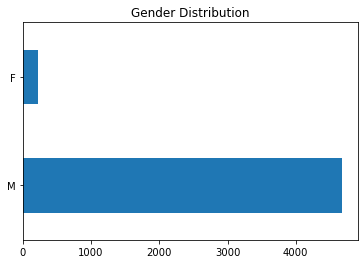

In [56]:
df.gender.value_counts().plot.barh().set_title("Gender Distribution")
plt.show()

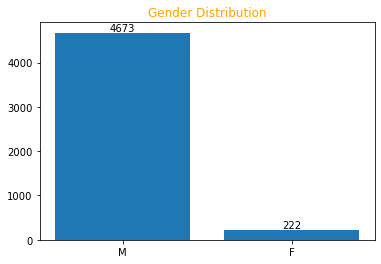

In [84]:
x=df.gender.value_counts().index
y=df.gender.value_counts().values
plt.title('Gender Distribution', color='orange')
for i in range(len(y)):
    plt.text(x[i],y[i],str(y[i]), ha='center', va='bottom') 
plt.bar(x,y)
plt.show()

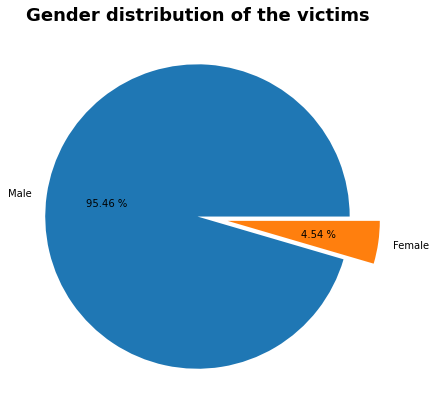

In [98]:
plt.figure(figsize=(7,7))
plt.pie(df.gender.value_counts() , autopct = '%.2f %%' , labels = ['Male' , 'Female'] ,explode = (0,0.2))
plt.title('Gender distribution of the victims' , fontdict={ 'fontweight' : 'bold', 'fontsize' : 18 })
plt.show()

#### Around 22.5% of the victims showed some mental illness.

In [63]:
df.signs_of_mental_illness.value_counts()

False    3792
True     1103
Name: signs_of_mental_illness, dtype: int64

In [65]:
df.signs_of_mental_illness.value_counts(normalize=True)

False    0.774668
True     0.225332
Name: signs_of_mental_illness, dtype: float64

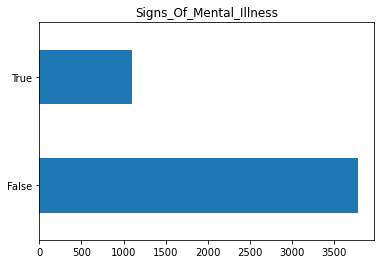

In [72]:
df.signs_of_mental_illness.value_counts().plot.barh().set_title("Signs_Of_Mental_Illness")
plt.show()

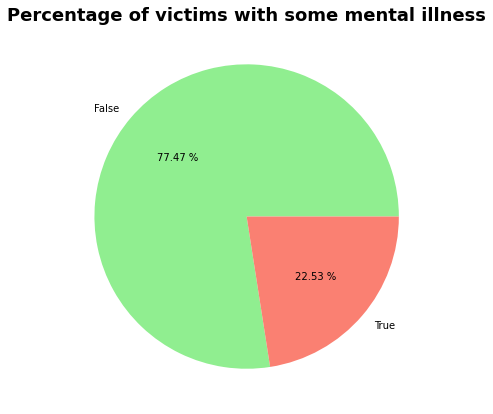

In [95]:
plt.figure(figsize = (7,7))
plt.pie(df.signs_of_mental_illness.value_counts() , autopct = '%.2f %%' , colors = ['lightgreen','salmon'], 
        labels = [ 'False','True' ])
plt.title('Percentage of victims with some mental illness' , fontdict={ 'fontweight' : 'bold', 'fontsize' : 18 },)
plt.show()

#### Around 22.5% of the victims showed some mental illness.

In [93]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,year
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns,2015
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns,2015
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed,2015
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects,2015
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects,2015


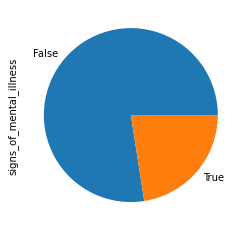

In [68]:
df.signs_of_mental_illness.value_counts().plot.pie()
plt.show()

#### PLOT FOR WHEATHER NEWS REPORTER INDICATING AN OFFICER WEARING A BODY CAMERA OR NOT

In [86]:
df.body_camera.value_counts()

False    4317
True      578
Name: body_camera, dtype: int64

In [87]:
df.body_camera.value_counts(normalize=True)

False    0.88192
True     0.11808
Name: body_camera, dtype: float64

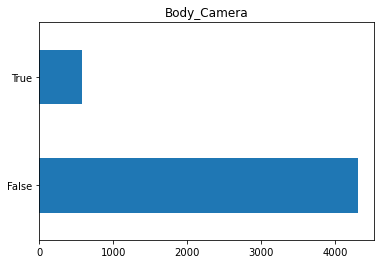

In [101]:
df.body_camera.value_counts().plot.barh().set_title("Body_Camera")
plt.show()

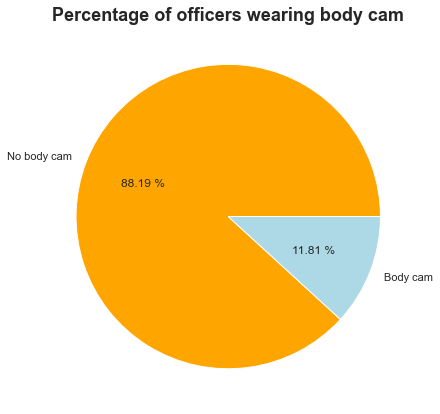

In [21]:
fig = plt.figure(figsize=(7,7))
plt.pie(df.body_camera.value_counts(),autopct = '%.2f %%',labels = ['No body cam', 'Body cam'], colors=['orange','lightblue'])
plt.title("Percentage of officers wearing body cam", 
          fontdict={ 'fontweight' : 'bold', 'fontsize' : 18 })
plt.show()

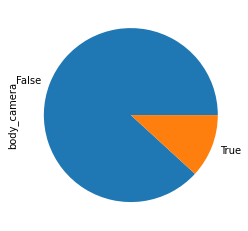

In [100]:
df.body_camera.value_counts().plot.pie()
plt.show()

#### Only a 12% of Officers were wearing a body cam in these cases.

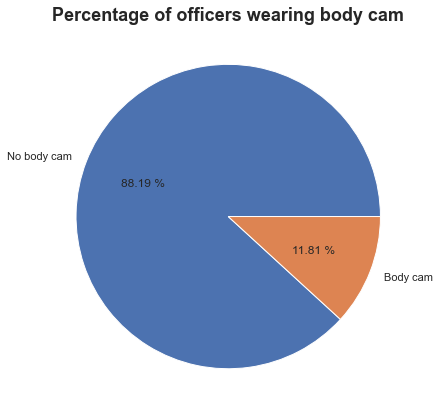

In [22]:
fig = plt.figure(figsize=(7,7))
plt.pie(df.body_camera.value_counts(),autopct = '%.2f %%',labels = ['No body cam', 'Body cam'])
plt.title("Percentage of officers wearing body cam", 
          fontdict={ 'fontweight' : 'bold', 'fontsize' : 18 })
plt.show()

### Bivariate and Multivariate Analysis

#### Numeric - Numeric Analysis

In [25]:
df1=df.copy()
df1.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,year
0,3,Tim Elliot,2015-01-02,shot,gun,53,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns,2015
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns,2015
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed,2015
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects,2015
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects,2015


In [27]:
df1['mental_health_issues']=df1['signs_of_mental_illness'].apply(lambda x: 1 if x==True else 0)

In [30]:
res=df1[['age','mental_health_issues']].corr()
res.mean().mean()

0.5484398724528722

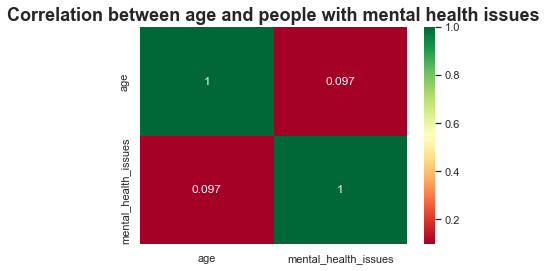

In [34]:
sns.heatmap(res, annot=True, cmap='RdYlGn', center=0.548)
plt.title('Correlation between age and people with mental health issues', fontweight='bold', fontsize=18)
plt.show()

#### With this plot we will get linear relationship between different numerical data type columns(age, mental_health_issues).

#### Categorical - Numerical Analysis

#### PLOT FOR THE NUMBER OF AGE OF KILLED PEOPLE UNDER TWO GROUPS: UNDER 25 & ABOVE 25

In [12]:
df1['age_category']=df1['age'].apply(lambda x: "Above 25" if x>=25 else("Below 25" if x<25 else "Others"))

In [14]:
df1['age_category'].value_counts()

Above 25    4044
Below 25     851
Name: age_category, dtype: int64

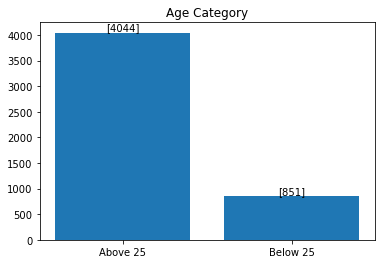

In [22]:
x=df1.age_category.value_counts().index
y=df1.age_category.value_counts().values
plt.bar(x,y)
plt.title("Age Category")
for i in range(2):
    plt.text(x[i], y[i], str([y[i]]), ha='center', va='bottom')

#### PLOT FOR PEOPLE MENTAL HEALTH CONDITION UNDER TWO CATEGORIES: ABOVE 25 & BELOW 25

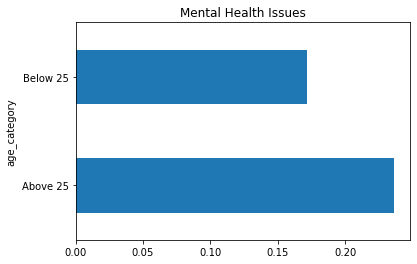

In [23]:
df1.groupby('age_category')['mental_health_issues'].mean().plot.barh().set_title("Mental Health Issues")
plt.show()

#### If we observe carefully here, people with more than 25 years are having more mental health issues than people having below 25 years.

#### PLOT FOR  PEOPLE MENTAL HEALTH CONDITION COMPARING BETWEEN MALE AND FEMALE

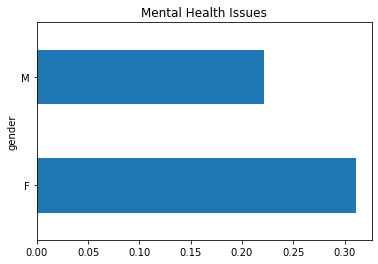

In [21]:
df1.groupby('gender')['mental_health_issues'].mean().plot.barh().set_title("Mental Health Issues")
plt.show()

#### With this plot we can say that females are likely to have more mental health issues than that of males.

#### PLOT BEWTEEN PEOPLE MENTAL HEALTH CONDITION AND THE WAY THEY ARE THREATENING POLICE OFFICERS

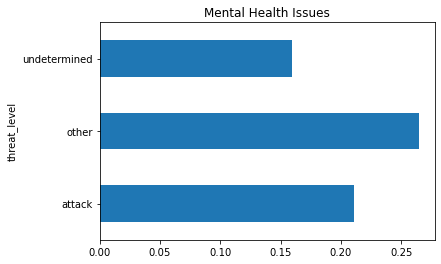

In [24]:
df1.groupby('threat_level')['mental_health_issues'].mean().plot.barh().set_title("Mental Health Issues")
plt.show()

#### Here, if we observe carefully people are mostly from "other" category that means where officers or others faced significant threats and after that people with mental health issues are more likely to threaten police officers and that is obvious.

### Categorical - Categorical Analysis

In [33]:
df1['officer_camera']=df1['body_camera'].apply(lambda x: 1 if x==True else 0)
df1['officer_camera'].value_counts()

0    4317
1     578
Name: officer_camera, dtype: int64

#### PLOT BETWEEN OFFICER WEARING A BODY CAMERA AND GENDER

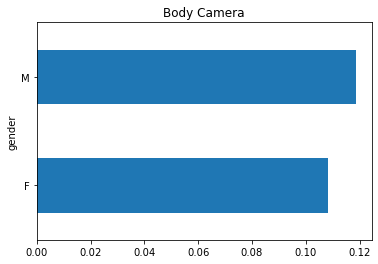

In [27]:
df1.groupby('gender')['officer_camera'].mean().plot.barh().set_title("Body Camera")
plt.show()

#### Here, If we observe carefully the percentage of police officers carrying body camera while shooting males is slightly higher than that of females. This means police officers are often carrying body cameras regardless of whom they are going to kill though we had some early doubts on why they are focusing more on men than women.

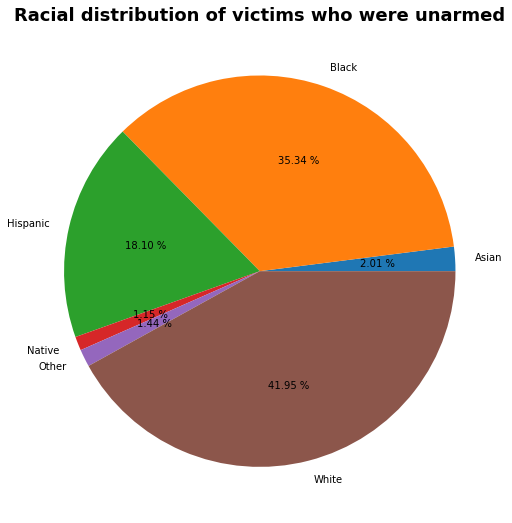

In [75]:
label = np.unique(df.race)
arr = []
for i in label:
    op = df[df.armed == 'unarmed']
    op = op[op.race == i]
    arr.append(op.shape[0])
fig = plt.figure(figsize=(9 ,9))
plt.pie(arr,labels = label,autopct = '%.2f %%')
plt.title("Racial distribution of victims who were unarmed" , fontdict={ 'fontweight' : 'bold', 'fontsize' : 18 })
plt.show() 

#### This chart reveals that more than 35% of the victims were black. This definitely shows hints of racism since the percentage of black people has increased even more in case of the victim being unarmed.

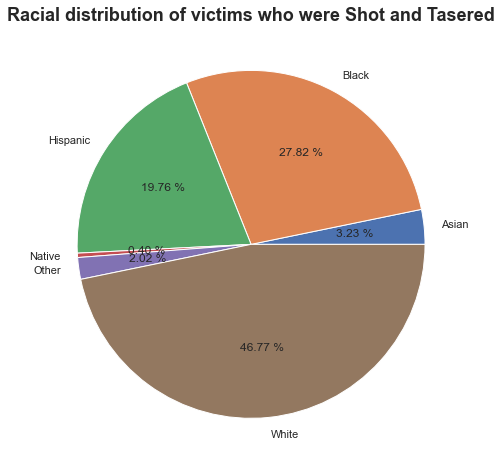

In [35]:
labels2 = np.unique(df.race)
arr = []
for i in labels2:
    og = df[df.manner_of_death == 'shot and Tasered']
    og = og[og.race == i]
    arr.append(og.shape[0])  
plt.figure(figsize = (8,8))
plt.pie(arr,labels = labels2,autopct = '%.2f %%')
plt.title("Racial distribution of victims who were Shot and Tasered" , fontdict={ 'fontweight' : 'bold', 'fontsize' : 18 })
plt.show()

#### Almost 28% of the shot and tasered victims are Black.

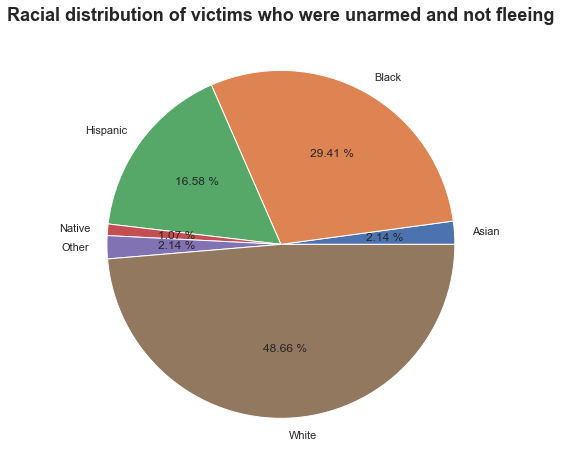

In [36]:
labels = np.unique(df.race)
arr=[]
for i in labels:
    op = df.loc[(df['armed'] == 'unarmed') & (df['flee'] == 'Not fleeing')]
    op = op[op.race == i]
    arr.append(op.shape[0])
plt.figure(figsize = (8,8))
plt.pie(arr , labels =labels , autopct = '%.2f %%')
plt.title("Racial distribution of victims who were unarmed and not fleeing" , 
          fontdict={ 'fontweight' : 'bold', 'fontsize' : 18 })
plt.show()

#### This entire pie-chart represents cold-blooded murder(by the police) according to my opinion. The victim was unarmed and not even trying to run away. What possible explanation can the police provide for these shootings. How can someone feel safe in their own country if crimes like these keep happening. Also, a whopping 30% of the victims are from the black community which again shows racial bias.